/home/rofarate/PIC-STELLARATOR/.venv/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.9981500402147306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9981500402147306
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.9981500402147306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9981500402147306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 15277, number of used features: 8
[LightGBM] [Info] Start training from score 4.064591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

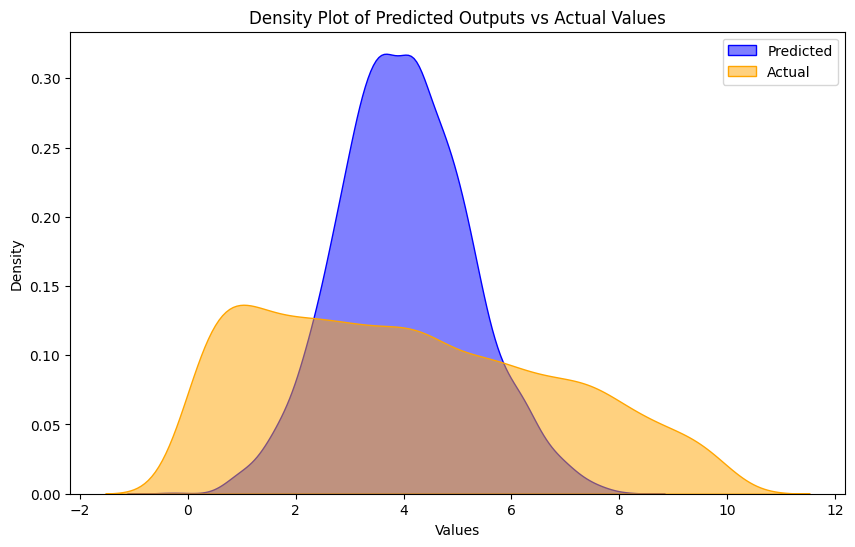

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the true positive predictions from the CSV file
true_positive_predictions_file = 'true_positive_predictions_with_quasi.csv'
true_positive_data = pd.read_csv(true_positive_predictions_file)

# Separate features and target variable
X = true_positive_data[['rbc_1_0', 'rbc_m1_1', 'rbc_0_1', 'rbc_1_1','zbs_1_0', 'zbs_m1_1', 'zbs_0_1', 'zbs_1_1']] 
Y = true_positive_data['quasisymmetry']

features_no_outliers, test_features_no_outliers, target_no_outliers, test_target_no_outliers = train_test_split(X, Y, test_size=0.2, random_state=42)

#print('Best trial:', study.best_trial)
#print('Best value:', study.best_value)
#print('Best parameters:', study.best_params)

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Assuming study.best_params already includes the best hyperparameters from your Optuna study for a regression problem
#model = lgb.LGBMRegressor(**study.best_params)

best_params_manual = {
    "boosting_type": "dart",
    "max_depth": 26,
    "num_leaves": 254,
    "min_data_in_leaf": 100,
    "feature_fraction": 0.9981500402147306,
    "learning_rate": 0.10433405411031996,
    "num_iterations": 773,
    "data_sample_strategy": "bagging",
    "max_bins": 57
}

# Create and train the LightGBM model with the manually defined best parameters
model = lgb.LGBMRegressor(**best_params_manual)

# Assuming features_no_outliers and target_no_outliers are your feature matrix and target vector, respectively
model.fit(features_no_outliers, target_no_outliers)

# After fitting, you can use the model to predict or evaluate it further
# For example, to predict new values
predictions = model.predict(test_features_no_outliers)

mse = mean_squared_error(test_target_no_outliers, predictions)
mae = mean_absolute_error(test_target_no_outliers, predictions)
r2 = r2_score(test_target_no_outliers, predictions)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test R^2: {r2}")

df_predictions = pd.DataFrame({
    "Predicted": predictions.flatten(),  # Flatten in case the predictions are in a 2D array
    "Type": "Predicted"
})
df_actual = pd.DataFrame({
    "Predicted": np.tile(test_target_no_outliers, (len(predictions) // len(test_target_no_outliers))),
    "Type": "Actual"
})

import matplotlib.pyplot as plt
import seaborn as sns

for i in range(len(predictions)):
    if predictions[i] < 0:
        print(f"Predicted: {predictions[i]}, Actual: {test_target_no_outliers.iloc[i]}")

# Combine and plot
#df_combined = pd.concat([df_predictions, df_actual])
print(predictions.shape)
print(test_target_no_outliers.shape)

plt.figure(figsize=(10, 6))
sns.kdeplot(predictions, fill=True, color="blue", alpha=0.5, label="Predicted")
sns.kdeplot(test_target_no_outliers, fill=True, color="orange", alpha=0.5, label="Actual")
plt.title('Density Plot of Predicted Outputs vs Actual Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()



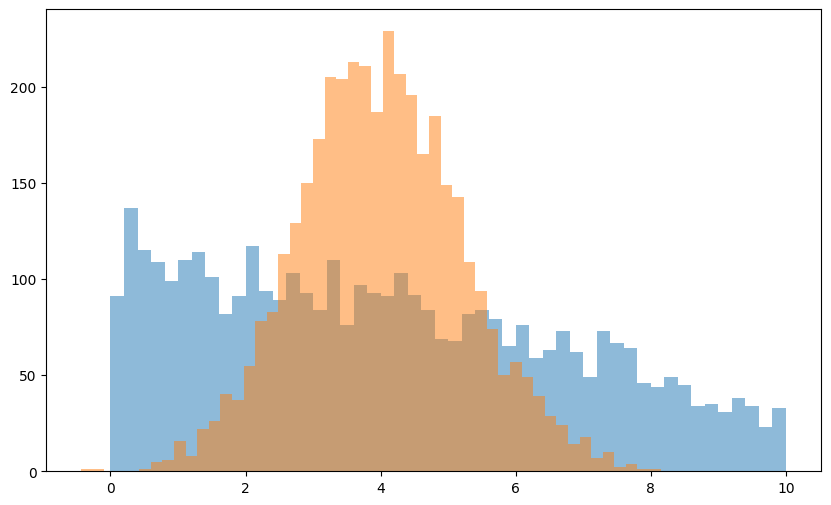

In [5]:
plt.figure(figsize=(10, 6)) 
plt.hist(test_target_no_outliers, bins=50, alpha=0.5, label='Predicted')
plt.hist(predictions, bins=50, alpha=0.5, label='Actual')
plt.show()


Fitting Beta distribution:   0%|          | 0/18 [00:00<?, ?it/s]      

Fitting of candidate distributions completed: 100%|██████████| 18/18 [01:00<00:00,  3.37s/it]


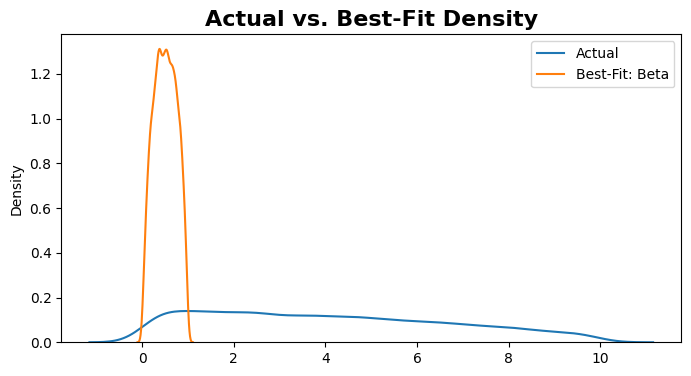

               nll      distribution
rank                                
1     4.015893e+02              Beta
2     1.885617e+03            ZABeta
3     5.316854e+04             Gamma
4     5.402457e+04           Weibull
5     5.469507e+04          StudentT
6     5.814932e+04            Cauchy
7     6.043276e+04         LogNormal
8     6.375705e+04           ZAGamma
9     6.631943e+04  NegativeBinomial
10    7.102128e+04              ZALN
11    7.690794e+04              ZINB
11    7.690794e+04              ZINB
13    1.011505e+05            Gumbel
14    1.129730e+05           Poisson
15    1.505154e+05         Expectile
16    1.789162e+05        SplineFlow
17    6.055108e+05          Gaussian
18    2.989841e+07           Laplace


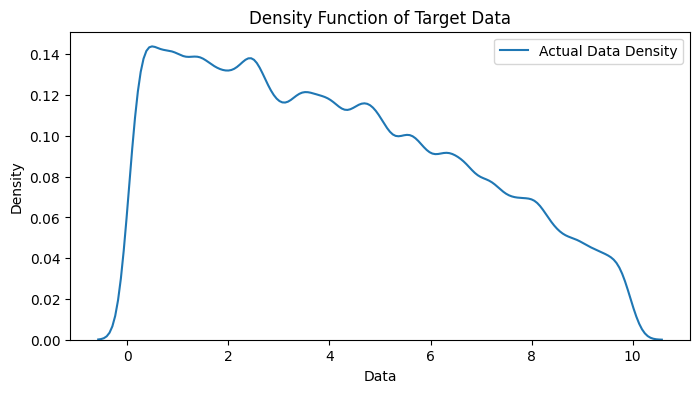

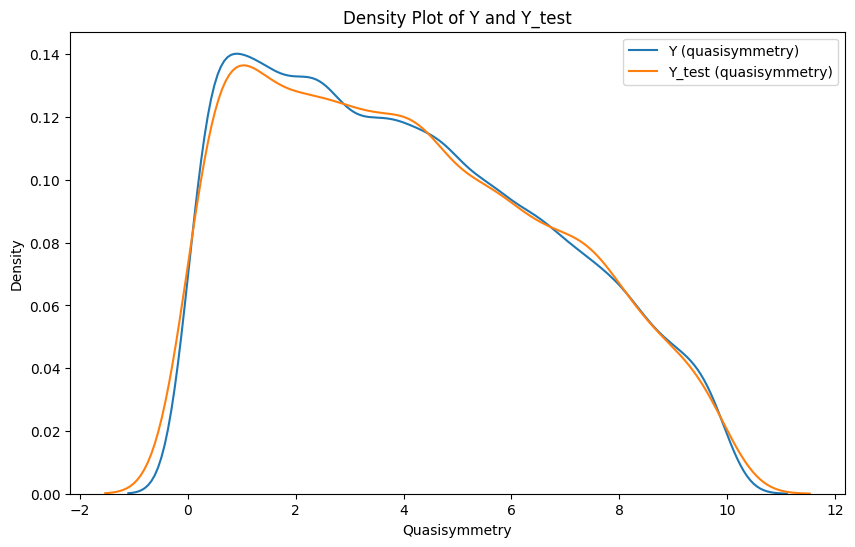

  0%|          | 0/1 [00:00<?, ?it/s]Exception ignored on calling ctypes callback function: <function _log_callback at 0x7f066bdfeef0>
Traceback (most recent call last):
  File "/home/rofarate/PIC-STELLARATOR/.venv/lib/python3.10/site-packages/lightgbm/basic.py", line 224, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


In [7]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbmlss.distributions import *
from lightgbmlss.distributions.distribution_utils import DistributionClass
import numpy as np


# Load the true positive predictions from the CSV file
true_positive_predictions_file = 'true_positive_predictions_with_quasi.csv'
true_positive_data = pd.read_csv(true_positive_predictions_file)

# Separate features and target variable
X = true_positive_data[['rbc_1_0', 'rbc_m1_1', 'rbc_0_1', 'rbc_1_1','zbs_1_0', 'zbs_m1_1', 'zbs_0_1', 'zbs_1_1']] 
Y = true_positive_data['quasisymmetry']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

target_no_outliers_np = np.array(Y_train)

# Initialize DistributionClass
lgblss_dist_class = DistributionClass()

# Define candidate distributions
candidate_distributions = [Beta, Cauchy, Expectile, Gamma, Gaussian, Gumbel, Laplace, LogNormal, NegativeBinomial, Poisson, SplineFlow, StudentT, Weibull, ZABeta, ZAGamma, ZALN, ZINB, ZINB]


# Selecting the best distribution based on negative log-likelihood
dist_nll = lgblss_dist_class.dist_select(target=target_no_outliers_np, candidate_distributions=candidate_distributions, max_iter=50, plot=True, figure_size=(8, 4))
print(dist_nll)

# Plot the actual data density
plt.figure(figsize=(8, 4))
sns.kdeplot(target_no_outliers_np, bw_adjust=0.5, label='Actual Data Density')
plt.title('Density Function of Target Data')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot the distribution of Y and Y_test
plt.figure(figsize=(10, 6))
sns.kdeplot(Y, label='Y (quasisymmetry)')
sns.kdeplot(Y_test, label='Y_test (quasisymmetry)')
plt.title('Density Plot of Y and Y_test')
plt.xlabel('Quasisymmetry')
plt.ylabel('Density')
plt.legend()
plt.show()


from lightgbmlss.model import LightGBMLSS
from lightgbmlss.distributions.Weibull import *
import lightgbm as lgb
import numpy as np

# Select the first 1000 samples from X_train and their corresponding labels
X_train_subset = X_train
Y_train_subset = Y_train

# Create the Dataset with max_bin parameter specified
dtrain = lgb.Dataset(X_train_subset, label=Y_train_subset.values, params={'max_bin': 500})

# Initialize the LightGBMLSS model with the Weibull distribution
lgblss = LightGBMLSS(
    Weibull(stabilization="L2", response_fn="exp", loss_fn="nll")
)

# Define the parameter dictionary without max_bin
param_dict = {
    "max_depth": ["int", {"low": 1, "high": 25, "log": False}],
    "num_leaves": ["int", {"low": 2, "high": 100, "log": True}],
    "min_data_in_leaf": ["int", {"low": 20, "high": 500, "log": False}],
    "min_gain_to_split": ["float", {"low": 0.01, "high": 40, "log": True}],
    "min_sum_hessian_in_leaf": ["float", {"low": 0.01, "high": 100, "log": True}],
    #"subsample": ["float", {"low": 0.5, "high": 1.0, "log": False}],
    #"subsample_freq": ["int", {"low": 1, "high": 20, "log": False}],
    "feature_fraction": ["float", {"low": 0.3, "high": 1.0, "log": False}],
    "boosting_type": ["categorical", ["dart", "goss", "gbdt"]],
    "learning_rate": ["float", {"low": 0.1, "high": 0.2, "log": True}],
    # "lambda_l1" and "lambda_l2" are commented out as before
    "max_delta_step": ["float", {"low": 0, "high": 1, "log": False}],
    "num_boost_round": ["int", {"low": 5, "high": 1000, "log": True}],
    "feature_pre_filter": ["categorical", [False]],
}

# Set a seed for reproducibility
np.random.seed(123)

# Perform hyperparameter optimization
opt_param = lgblss.hyper_opt(
    param_dict,
    dtrain,
    #num_boost_round=30,
    nfold=5,
    early_stopping_rounds=50,
    max_minutes=403,
    n_trials=1,
    silence=True,
    seed=13,
    hp_seed=123
)

import numpy as np
import torch
from lightgbmlss.model import LightGBMLSS  # Ensure this import matches your actual usage

# Seed for reproducibility in numpy operations
np.random.seed(123)

# Assuming opt_param is defined somewhere in your code
opt_params = opt_param.copy()
n_rounds = opt_params['num_boost_round']
del opt_params['num_boost_round']

print('ewfre', opt_params)
print('nu, boost', n_rounds)

# Assuming dtrain is defined and is an appropriate dataset for training
# Train Model with optimized hyperparameters
lgblss.train(opt_params, dtrain, num_boost_round=n_rounds)

# Seed for reproducibility in torch operations
torch.manual_seed(123)

# Number of samples to draw from predicted distribution
n_samples = len(X_test)  # Use the number of rows in X_test as the number of samples

# Sample from predicted distribution
pred_samples = lgblss.predict(
    X_test,
    pred_type="samples",
    n_samples=n_samples,
    seed=123
)

# Return predicted distributional parameters
pred_params = lgblss.predict(
    X_test,
    pred_type="parameters"
)


